In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
data1 = pd.read_csv('salary_dataset.csv')

In [17]:
data1

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [18]:
data1.head()

,no,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [20]:
data1.tail()

,no,YearsExperience,Salary
25,25,9.1,105583.0
26,26,9.6,116970.0
27,27,9.7,112636.0
28,28,10.4,122392.0
29,29,10.6,121873.0


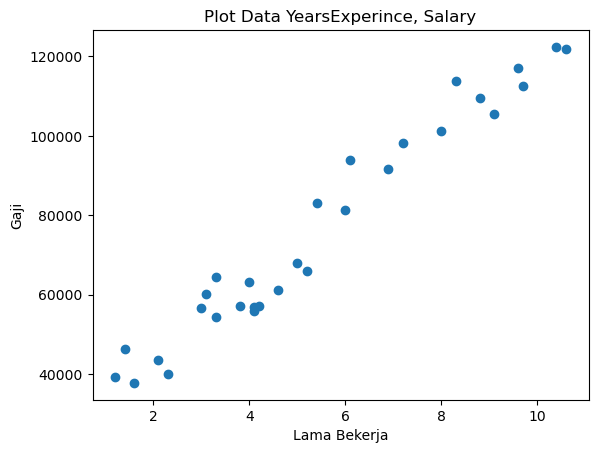

In [31]:
import matplotlib.pyplot as plt

plt.scatter(data1.YearsExperience, data1.Salary)
plt.xlabel('Lama Bekerja')
plt.ylabel('Gaji')
plt.title('Plot Data YearsExperince, Salary')
plt.show()

In [36]:
data2 = pd.read_csv('data-penjualan.csv', delimiter=';')
data2.head()

,promosi,penjualan
0,25,100
1,27,105
2,29,108
3,30,109
4,35,120


In [37]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   promosi    15 non-null     int64
 1   penjualan  15 non-null     int64
dtypes: int64(2)
memory usage: 372.0 bytes


In [38]:
data2.describe()

,promosi,penjualan
count,15.000000,15.000000
mean,53.866667,143.466667
std,19.657302,28.083718
min,25.000000,100.000000
25%,32.500000,114.500000
50%,60.000000,150.000000
75%,70.500000,165.500000
max,80.000000,180.000000


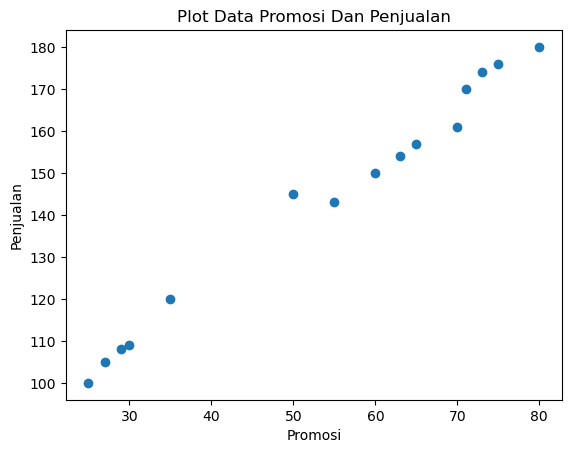

In [39]:
plt.scatter(data2.promosi, data2.penjualan)
plt.xlabel('Promosi')
plt.ylabel('Penjualan')
plt.title('Plot Data Promosi Dan Penjualan')
plt.show()

# KORELASI

In [40]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [41]:
data2.corr()

,promosi,penjualan
promosi,1.00000,0.99369
penjualan,0.99369,1.00000


# SPLIT KOLOM

In [43]:
#dara_salary
years_experience = data1['YearsExperience'].values[:, np.newaxis]
salary = data1['Salary'].values

#data_penjualan
promosi = data2['promosi'].values[:, np.newaxis]
penjualan = data2['penjualan'].values

# MODELING

In [44]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression() 
model2 = LinearRegression()

model1.fit(years_experience, salary)
model2.fit(promosi,penjualan)

LinearRegression()

# TESTING

In [48]:
#dataset1
x_test_baru = [[1.1],[11],[7]]
pred_salary_baru = model1.predict(x_test_baru)

#dataset2
promosi_test = [[20],[100]]
pred_penjualan = model2.predict(promosi_test)

print("Prediksi Gaji: ", pred_salary_baru)
print("Prediksi Promosi dan Penjualan: ", pred_penjualan)

Prediksi Gaji:  [ 35243.16252012 128797.78950253  90997.94021671]
Prediksi Promosi dan Penjualan:  [ 95.38781949 208.95989944]


# visualisasi

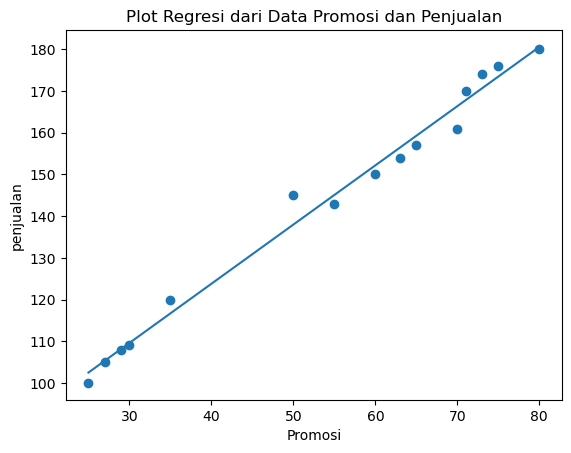

In [52]:
import matplotlib.pyplot as plt

prediksi_penjualan = model2.predict(promosi)
dataframe_baru = pd.DataFrame({'promosi': data2.promosi, 'penjualan': prediksi_penjualan})
plt.scatter(data2.promosi, data2.penjualan)
plt.plot(dataframe_baru.promosi, dataframe_baru.penjualan)
plt.xlabel('Promosi')
plt.ylabel('penjualan')
plt.title('Plot Regresi dari Data Promosi dan Penjualan')
plt.show()

# CEK AKURASI

In [54]:
from sklearn.metrics import r2_score
akurasi = r2_score(data2,dataframe_baru)
print(akurasi*100)

99.37098507592287


# PEMBUKTIAN RUMUS

In [55]:
#dataset1
print("Koefisien: ", model1.coef_)
print("Intercept: ", model1.intercept_)

#dataset2
print("Koefisien: ", model2.coef_)
print("Intercept: ", model2.intercept_)

Koefisien:  [9449.96232146]
Intercept:  24848.203966523208
Koefisien:  [1.419651]
Intercept:  66.99479949720258


In [59]:
#dataset1
y = model1.intercept_+ model1.coef_*2.1
print(y)

#dataset2
y = model2.intercept_+ model2.coef_*25
print(y)

[44693.12484158]
[102.48607448]
